# Step 2 - Classification of text data using fully connected neural networks

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

In [2]:
def show_percentage(m, n):
    clear_output(wait=True)
    k = m / (n - 1)
    percent = int(k * 100)
    print('[' + 'x'*percent + '-'*(100 - percent) + ']' + " {:.2%}".format(k))
    print("{}/{} complete".format(m + 1, n))

### Get the Data

In [3]:
# https://www.kaggle.com/adarshsng/predicting-job-type-category-by-job-description
def str_to_lst(x):
    return x.replace("'", "").replace("[", "").replace("]", "").split(", ")


df = pd.read_csv("data/preprocessed_data.csv")
df['job_description'] = df['job_description'].apply(lambda x: str_to_lst(x))
df.head()

,job_no,job_description,job_type,category
0,Id-12765,"[zest, scientific, searching, accomplished, sc...",Permanent,"Pharmaceutical, Healthcare and Medical Sales"
1,Id-22925,"[world, typical, cro, company, making, wave, b...",Permanent,Clinical Research
2,Id-1321,"[asha, mistry, umbilical, life, recruiting, ex...",Contract/Interim,Pharmaceutical Marketing
3,Id-9473,"[sale, representative, laser, der, medizintech...",Permanent,"Pharmaceutical, Healthcare and Medical Sales"
4,Id-14952,"[field, service, engineer, life, science, camb...",Permanent,Manufacturing & Operations


### Job Type

In [4]:
Job_type = {
    'Permanent':0,
    'Contract/Interim':1,
    'Contract/Temp':2,
    'Temporary/Seasonal':3,
    'Any':4,
    'Part-Time':5
    }

df['type_label'] = df['job_type'].apply(lambda x: Job_type[x])
df.head()

,job_no,job_description,job_type,category,type_label
0,Id-12765,"[zest, scientific, searching, accomplished, sc...",Permanent,"Pharmaceutical, Healthcare and Medical Sales",0
1,Id-22925,"[world, typical, cro, company, making, wave, b...",Permanent,Clinical Research,0
2,Id-1321,"[asha, mistry, umbilical, life, recruiting, ex...",Contract/Interim,Pharmaceutical Marketing,1
3,Id-9473,"[sale, representative, laser, der, medizintech...",Permanent,"Pharmaceutical, Healthcare and Medical Sales",0
4,Id-14952,"[field, service, engineer, life, science, camb...",Permanent,Manufacturing & Operations,0


In [5]:
# split the data
X_train, X_test, Y_train, Y_test = train_test_split(df['job_description'], 
                                                    df['type_label'], 
                                                    test_size=0.20, 
                                                    random_state=42)

### Vectorization

In [4]:
tokens = []

for lst in df["job_description"]:
    tokens += lst
    
dictionary = list(set(tokens))
dictionary.sort()

def tokens_to_num(lst):
    res = [dictionary.index(i) for i in lst]
    return res

In [7]:
#X_train = X_train.apply(tokens_to_num)
for i in range(len(X_train)):
    lst = X_train.iloc[i]
    X_train.iloc[i] = tokens_to_num(lst)
    show_percentage(i, len(X_train))
    

train_copy = pd.DataFrame([X_train.copy()]).T
train_copy["y"] = Y_train.copy()
train_copy.to_csv("data/tmp_type_train.csv", index=False)

[xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.00%
14125/14125 complete


In [8]:
#X_test = X_test.apply(tokens_to_num)
for i in range(len(X_test)):
    lst = X_test.iloc[i]
    X_test.iloc[i] = tokens_to_num(lst)
    show_percentage(i, len(X_test))
    

test_copy = pd.DataFrame([X_test.copy()]).T
test_copy["y"] = Y_test.copy()
test_copy.to_csv("data/tmp_type_test.csv", index=False)

[xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.00%
3532/3532 complete


In [5]:
def vectorize_sequences(sequences, dimension = len(dictionary)):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [9]:
x_train = vectorize_sequences(X_train)
x_test = vectorize_sequences(X_test)
y_train = np.asarray(Y_train).astype("float32")
y_test = np.asarray(Y_test).astype("float32")

### Train a fully connected neural network

In [10]:
model_type = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_type.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history = model_type.fit(x_train,
                    y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2,
                    shuffle = True,
                    verbose = 2)

Epoch 1/10
89/89 - 9s - loss: 0.1403 - accuracy: 0.9285 - val_loss: 0.1386 - val_accuracy: 0.9483 - 9s/epoch - 106ms/step
Epoch 2/10
89/89 - 1s - loss: 0.0888 - accuracy: 0.9613 - val_loss: 0.1220 - val_accuracy: 0.9593 - 1s/epoch - 11ms/step
Epoch 3/10
89/89 - 1s - loss: 0.0801 - accuracy: 0.9669 - val_loss: 0.1181 - val_accuracy: 0.9604 - 1s/epoch - 12ms/step
Epoch 4/10
89/89 - 1s - loss: 0.0771 - accuracy: 0.9690 - val_loss: 0.1177 - val_accuracy: 0.9593 - 970ms/epoch - 11ms/step
Epoch 5/10
89/89 - 1s - loss: 0.0761 - accuracy: 0.9697 - val_loss: 0.1165 - val_accuracy: 0.9618 - 883ms/epoch - 10ms/step
Epoch 6/10
89/89 - 1s - loss: 0.0761 - accuracy: 0.9702 - val_loss: 0.1156 - val_accuracy: 0.9625 - 1s/epoch - 15ms/step
Epoch 7/10
89/89 - 1s - loss: 0.0752 - accuracy: 0.9696 - val_loss: 0.1162 - val_accuracy: 0.9611 - 910ms/epoch - 10ms/step
Epoch 8/10
89/89 - 1s - loss: 0.0746 - accuracy: 0.9704 - val_loss: 0.1192 - val_accuracy: 0.9582 - 872ms/epoch - 10ms/step
Epoch 9/10
89/89 - 

In [11]:
model_type.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                518176    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 518,209
Trainable params: 518,209
Non-trainable params: 0
_________________________________________________________________


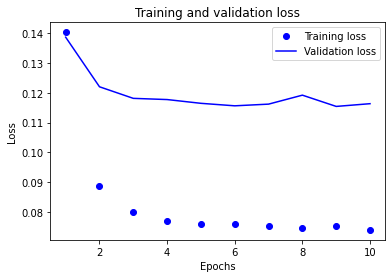

In [12]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [13]:
score = model_type.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.07891742885112762
Test accuracy: 0.9646092653274536


### Category

In [6]:
Category = {
    'Pharmaceutical, Healthcare and Medical Sales':0,
    'Clinical Research':1,
    'Pharmaceutical Marketing':2,
    'Manufacturing & Operations':3,
    'Science':4,
    'Medical Affairs / Pharmaceutical Physician':5,
    'Regulatory Affairs':6,
    'Medical Information and Pharmacovigilance':7,
    'Data Management and Statistics':8,
    'Quality-assurance':9,
    'Pharmacy':10
    }


df['category_label'] = df['category'].apply(lambda x: Category[x])
df.head()

,job_no,job_description,job_type,category,category_label
0,Id-12765,"[zest, scientific, searching, accomplished, sc...",Permanent,"Pharmaceutical, Healthcare and Medical Sales",0
1,Id-22925,"[world, typical, cro, company, making, wave, b...",Permanent,Clinical Research,1
2,Id-1321,"[asha, mistry, umbilical, life, recruiting, ex...",Contract/Interim,Pharmaceutical Marketing,2
3,Id-9473,"[sale, representative, laser, der, medizintech...",Permanent,"Pharmaceutical, Healthcare and Medical Sales",0
4,Id-14952,"[field, service, engineer, life, science, camb...",Permanent,Manufacturing & Operations,3


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(df['job_description'], 
                                                    df['category_label'], 
                                                    test_size=0.20, 
                                                    random_state=42)

In [16]:
#X_train = X_train.apply(tokens_to_num)
for i in range(len(X_train)):
    lst = X_train.iloc[i]
    X_train.iloc[i] = tokens_to_num(lst)
    show_percentage(i, len(X_train))
    

train_copy = pd.DataFrame([X_train.copy()]).T
train_copy["y"] = Y_train.copy()
train_copy.to_csv("data/tmp_category_train.csv", index=False)

[xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.00%
14125/14125 complete


In [17]:
#X_test = X_test.apply(tokens_to_num)
for i in range(len(X_test)):
    lst = X_test.iloc[i]
    X_test.iloc[i] = tokens_to_num(lst)
    show_percentage(i, len(X_test))
    

test_copy = pd.DataFrame([X_test.copy()]).T
test_copy["y"] = Y_test.copy()
test_copy.to_csv("data/tmp_category_test.csv", index=False)

[xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.00%
3532/3532 complete


In [8]:
x_train = vectorize_sequences(X_train)
x_test = vectorize_sequences(X_test)
y_train = np.asarray(Y_train).astype("float32")
y_test = np.asarray(Y_test).astype("float32")

In [9]:
model_category = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_category.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history = model_category.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    shuffle = True,
                    verbose = 2)

Epoch 1/10
89/89 - 2s - loss: 10.6250 - accuracy: 0.2165 - val_loss: 10.4947 - val_accuracy: 0.3041 - 2s/epoch - 22ms/step
Epoch 2/10
89/89 - 2s - loss: 10.4954 - accuracy: 0.3212 - val_loss: 10.4713 - val_accuracy: 0.3147 - 2s/epoch - 18ms/step
Epoch 3/10
89/89 - 1s - loss: 10.4731 - accuracy: 0.3358 - val_loss: 10.4648 - val_accuracy: 0.3267 - 1s/epoch - 17ms/step
Epoch 4/10
89/89 - 1s - loss: 10.4621 - accuracy: 0.3473 - val_loss: 10.4576 - val_accuracy: 0.3172 - 830ms/epoch - 9ms/step
Epoch 5/10
89/89 - 1s - loss: 10.4548 - accuracy: 0.3515 - val_loss: 10.4608 - val_accuracy: 0.3242 - 894ms/epoch - 10ms/step
Epoch 6/10
89/89 - 1s - loss: 10.4473 - accuracy: 0.3609 - val_loss: 10.4475 - val_accuracy: 0.3214 - 822ms/epoch - 9ms/step
Epoch 7/10
89/89 - 1s - loss: 10.4416 - accuracy: 0.3634 - val_loss: 10.4558 - val_accuracy: 0.3437 - 826ms/epoch - 9ms/step
Epoch 8/10
89/89 - 1s - loss: 10.4382 - accuracy: 0.3671 - val_loss: 10.4501 - val_accuracy: 0.3405 - 891ms/epoch - 10ms/step
Epoc

In [10]:
model_category.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                518176    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 518,209
Trainable params: 518,209
Non-trainable params: 0
_________________________________________________________________


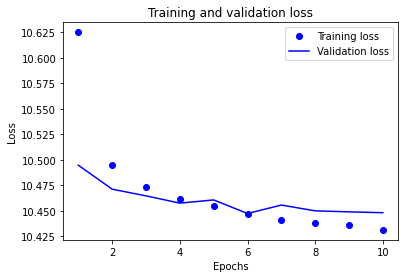

In [11]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
score = model_category.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 9.896992683410645
Test accuracy: 0.35475650429725647
